### t test for feasability study 

In [26]:
import pandas as pd
import numpy as np
from scipy import stats

In [27]:
#import the data
df = pd.read_csv("0_final_df.csv")

final_df = pd.read_csv("0_final_df.csv")


In [28]:
#get the values for rest
rest_values = df[df["condition"] == "rest"]["standard deviation"].values

#get the values for stress
stress_values = df[df["condition"] == "stress"]["standard deviation"].values



Check if our data has normal distribution

In [29]:
stats.shapiro(rest_values) #rest

ShapiroResult(statistic=0.8407262563705444, pvalue=0.0003989214019384235)

Effect Size Calculation

In [30]:
import numpy as np
from scipy import stats

# Data
stress = final_df[final_df["condition"] == "stress"]["standard deviation"].values
rest = final_df[final_df["condition"] == "rest"]["standard deviation"].values

# Paired two-sample t-test
t_statistic, p_value = stats.ttest_rel(stress, rest)

# Effect size calculation
n = len(stress)
mean_diff = np.mean(stress) - np.mean(rest)
pooled_std = np.sqrt(((n - 1) * np.var(stress) + (n - 1) * np.var(rest)) / (2 * (n - 1)))
effect_size = mean_diff / pooled_std

print("Effect Size (Cohen's d):", effect_size)


Effect Size (Cohen's d): 1.1337655128638684


In [31]:
import statsmodels.stats.power as ssp

alpha = 0.05  
beta = 0.2   
effect_size = 1.13 


sample_size = ssp.tt_ind_solve_power(effect_size=effect_size,
nobs1 = None, ratio = 1, alpha=alpha, power=(1 - beta), 
alternative='larger')

print("Sample Size:", round(sample_size))


Sample Size: 10


In [32]:
# Perform the Wilcoxon signed-rank test (one-tailed, alternative = 'greater')
statistic, p_value = stats.wilcoxon(stress_values, rest_values, alternative='greater')

# Format the p-value
p_value_formatted = "< 0.001" if p_value < 0.001 else "{:.3f}".format(p_value)

# Print the test statistic and p-value
print("Test statistic:", statistic)
print("p-value:", p_value_formatted)

Test statistic: 444.0
p-value: < 0.001


Now make a Variance Test

In [33]:
# Perform Fligner-Killeen test for equal variances of paired samples
statistic, p_value = stats.fligner(rest_values, stress_values)

# Format the p-value
p_value_formatted = "< 0.001" if p_value < 0.001 else "{:.3f}".format(p_value)

# Print the test statistic and p-value
print("Test statistic:", statistic)
print("p-value:", p_value_formatted)


Test statistic: 13.669501323920183
p-value: < 0.001


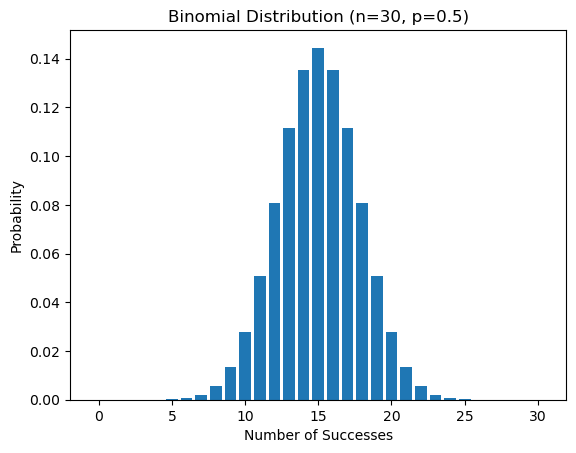

In [34]:
# Discrete Distribution
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

# Parameters
n = 30  # Number of trials
p = 0.5  # Probability of success

# Generate binomial distribution
x = np.arange(0, n+1)
binom_dist = binom.pmf(x, n, p)

# Plot the binomial distribution
plt.bar(x, binom_dist)
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title('Binomial Distribution (n=30, p=0.5)')
plt.show()


In [35]:
from scipy.stats import binom_test

# Parameters
n = 30  # Number of trials
p = 0.5  # Probability of success
x = 12  # Number of successes

# Perform hypothesis test
p_value = binom_test(x, n, p, alternative='two-sided')

# Print the p-value
print("p-value:", p_value)


p-value: 0.36159460805356514
